# Example of Applying Uniform Sampling Method to Molecular Evolution

In [1]:
from src.ECMC.uniformsampling import uniformsampling
import numpy as np
import matplotlib.pyplot as plt
import time

First, we define the function that generates the rate matrix for molecular evolution. 

In [2]:
def HKY(kappa, frq):
    """
    generate instaneous rate matrix for molecular evolution

    This function generates the instaneous rate matrix
    for molecular evolution at the level of nucleotide 
    based by substitution. 


    Parameters
    ----------
    kappa : int
        Expected number of substitution per site
    frq : np.ndarray
        The frequency of each nucleotide.
        From left to right is A, G, C, T.
    

    Returns
    -------
    np.ndarray
        The rate matrix generated.
    
    """
    Sym = np.array([[0, kappa, 1, 1],
                   [kappa, 0, 1, 1],
                   [1, 1, 0, kappa],
                   [1, 1, kappa, 0]])
    Frq = np.array([frq, frq, frq, frq])
    Q = np.dot(Sym, Frq)
    for i in range(4):
        Q[i, i] = -(np.sum(Q, axis = 1).tolist()[i] - Q[i, i])
    Q = Q/sum(-np.diag(Q)*frq)
    return Q

We then consider the scenario when the initial state of a DNA site is A and the ending state is G. 

In [3]:
frq = [0.2, 0.3, 0.3, 0.2]
Q = -HKY(2, frq)
a = 1
b = 2
dur = [None]*50
state = [None]*50

For different evolutionary time, the time to run the simulation is recorded. 

In [4]:
for T in range(50):
    start = time.time()
    path = uniformsampling(Q, T+1, a, b)
    end = time.time()
    dur[T] = end - start
    temp = [i[0] for i in path]
    state[T] = len(set(temp))

Text(0.5, 1.0, 'Number of State Changes across Time of Evolution')

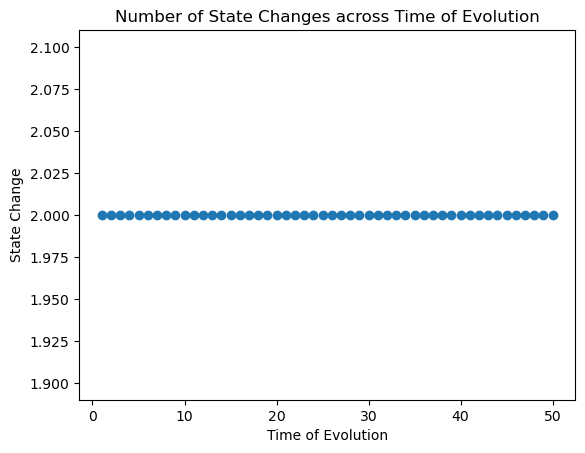

In [6]:
plt.scatter(range(1,51), state)
plt.xlabel("Time of Evolution")
plt.ylabel("State Change")
plt.title("Number of State Changes across Time of Evolution")

Here is an example of the sample path for the molecular evolution: 

Text(0, 0.5, 'State')

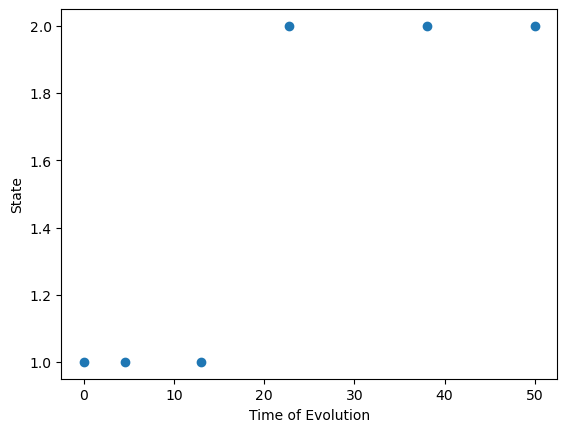

In [7]:
state = [i[0] for i in path]
timepoint = [i[1] for i in path]
plt.scatter(timepoint, state)
plt.xlabel("Time of Evolution")
plt.ylabel("State")

Here is how the time taken to run the simulation changes with the time of evolution. 

Text(0, 0.5, 'Time to Run')

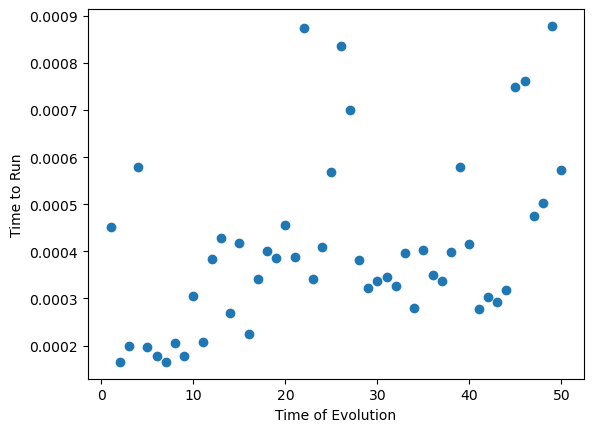

In [8]:
plt.scatter(range(1,51), dur)
plt.xlabel("Time of Evolution")
plt.ylabel("Time to Run")

## Some profiling

There are no significant difference in the time to run the simulations between when the starting and ending points are different and when the starting and ending points are the same. 

In [9]:
%%timeit
path = uniformsampling(Q, 50, 1, 2)

261 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%%timeit
path = uniformsampling(Q, 50, 1, 1)

258 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
